In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [2]:
request_header = {'User-Agent': 'Mozilla/5.0'}

In [3]:
url="https://housing.com/rent/flats-for-rent-in-hyderabad-telangana-P679xe73u28050522?page=1"

In [4]:
page = requests.get(url,headers = request_header)

In [5]:
page

<Response [200]>

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# website: http://ogp.me/ns/website#"><head><link href="//c.housingcdn.com" rel="preconnect"/><link href="//is1-3.housingcdn.com" rel="preconnect"/><link href="//eventrouter.housing.com" rel="preconnect"/><link href="//img.youtube.com" rel="preconnect"/><link href="//is1-2.housingcdn.com" rel="preconnect"/><link href="//housing-images.n7net.in" rel="preconnect"/><meta content="AsgGWjPX2xx12aBpNxa8enFVy/0d/Ghc/GLjQO1gdmgn6eayydZJK0TGTifjIngm+7B4rWjfgVoyHZFbeKq0pg4AAABgeyJvcmlnaW4iOiJodHRwczovL2hvdXNpbmcuY29tOjQ0MyIsImZlYXR1cmUiOiJXYWtlTG9jayIsImV4cGlyeSI6MTU5MTA5NTk2MSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/><meta content="no-referrer-when-downgrade" name="referrer"/><link as="image" href="//c.housingcdn.com/demand/s/client/common/assets/loader.fd27d2ce.svg" rel="prefetch"/><link as="font" crossorigin="anonymous" href="//c.housingcdn.com/demand/s/client/common/assets/style.24e9b99c.woff2" rel="preload"/><link as="
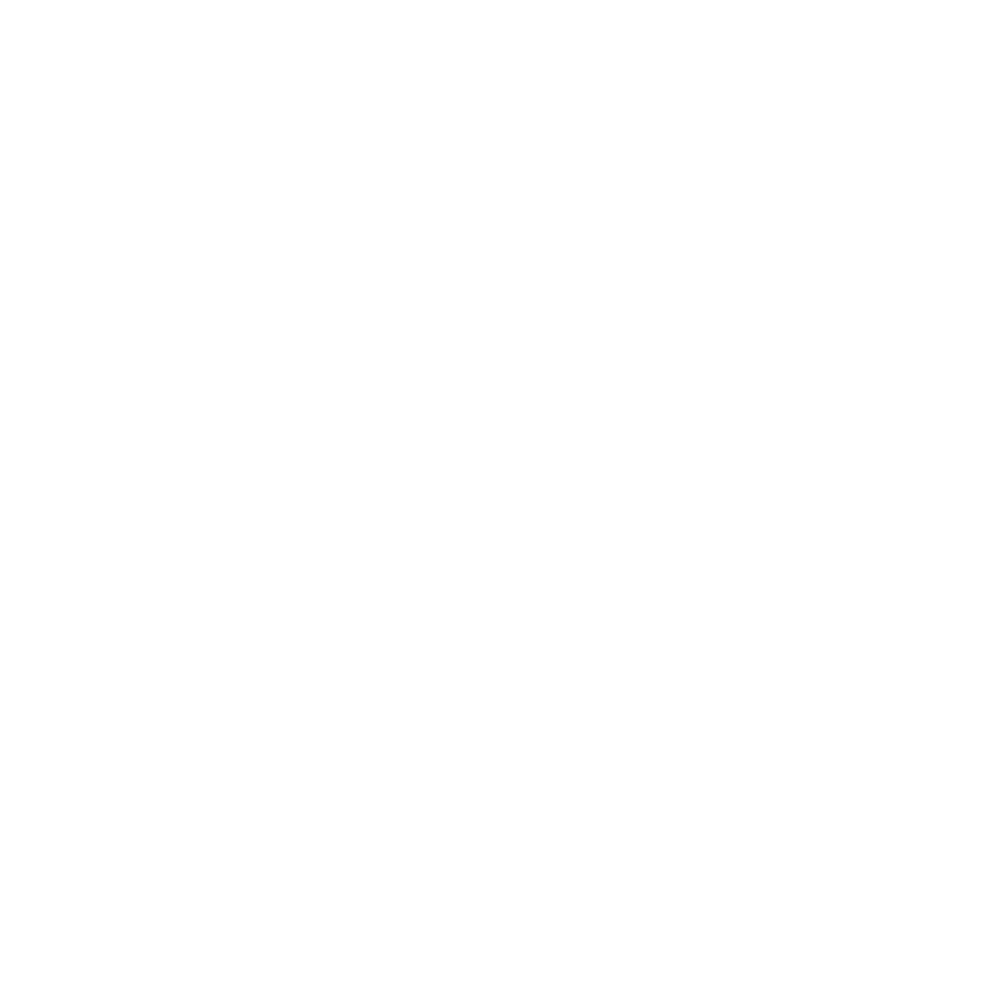

In [6]:
soup = BeautifulSoup(page.text)
soup

In [7]:
for i in soup.find_all("div",class_="T_infoStyle _1rft1bp4 _k84m1txw _1sfm1e54 _1yglcj1k _10yjkb7n _16wb15vq _10f91ulh _2hy4exct _1uhk1nn1 _3hqmdlk8 _93d91t02 _10m91e54 _j73acj1k _1i0zkb7n _19aa15vq _8bns1ulh _1nswgktf _czpcbfng _1epzexct _syf11t02 _leftgi _lkftgi _l8exct _cxexct _fc1yb4 _ar1bp4 _9s1txw _vy1ckf"):
    print(i.text)

2 BHK Flat for rent in Gachibowli   ₹32,000see price breakup1200 sq.ftBuiltup areaSemi furnishedFurnishing status Amenities: Lift  •  Parking  •  Power Backup  •  Water SupplyKRKGF RentalsHousing Expert PRO400+ buyers contactedContact
3 BHK Flat for rent in Narsingi  Rajapushpa Provincia ₹68,000see price breakup2335 sq.ftBuiltup areaSemi furnishedFurnishing status Highlights: 24x7 Security  •  ATM  •  Badminton Court  •  Basketball CourtDatrika SrinivasHousing Expert PRO700+ buyers contactedContact
3 BHK Flat for rent in Madhapur   ₹45,000see price breakup2500 sq.ftBuiltup areaSemi furnishedFurnishing status Highlights: Close to ATM  •  Close to Bus Stop  •  Close to Grocery Stores  •  Close to HospitalMPMudavath PushkarHousing Expert PRO800+ buyers contactedContact
2 BHK Flat for rent in Financial District  Prestige High Fields ₹65,000see price breakup1490 sq.ftBuiltup areaFully furnishedFurnishing status Highlights: 24x7 Security  •  Children Play Area  •  Gymnasium  •  Swimming Pool

In [8]:
BHK=[]
for i in soup.find_all("div",class_="T_infoStyle _1rft1bp4 _k84m1txw _1sfm1e54 _1yglcj1k _10yjkb7n _16wb15vq _10f91ulh _2hy4exct _1uhk1nn1 _3hqmdlk8 _93d91t02 _10m91e54 _j73acj1k _1i0zkb7n _19aa15vq _8bns1ulh _1nswgktf _czpcbfng _1epzexct _syf11t02 _leftgi _lkftgi _l8exct _cxexct _fc1yb4 _ar1bp4 _9s1txw _vy1ckf"):
    r = re.findall(r'(\d+)\s*BHK' ,i.text)
    BHK.append(r[0])
BHK[:31]


['2',
 '3',
 '3',
 '2',
 '3',
 '1',
 '2',
 '2',
 '3',
 '3',
 '2',
 '3',
 '1',
 '5',
 '2',
 '1',
 '3',
 '3',
 '4',
 '1',
 '3',
 '5',
 '1',
 '3',
 '1',
 '3',
 '2',
 '4',
 '1',
 '1']

In [9]:
len(BHK)

30

In [10]:
BHK_Type = []
for i in soup.find_all('h2', class_='title-style'):
    r = re.findall(r'(?:Flat|Villa|Duplex|Independent House)', i.text)
    if r:  
        BHK_Type.append(r[0])
    else:
        BHK_Type.append('Not Mentioned')  

print(BHK_Type)

['Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Villa', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat']


In [11]:
len(BHK_Type)

30

In [12]:
Location = []
for i in soup.find_all("div",class_="T_infoStyle _1rft1bp4 _k84m1txw _1sfm1e54 _1yglcj1k _10yjkb7n _16wb15vq _10f91ulh _2hy4exct _1uhk1nn1 _3hqmdlk8 _93d91t02 _10m91e54 _j73acj1k _1i0zkb7n _19aa15vq _8bns1ulh _1nswgktf _czpcbfng _1epzexct _syf11t02 _leftgi _lkftgi _l8exct _cxexct _fc1yb4 _ar1bp4 _9s1txw _vy1ckf"):
    r = re.findall(r'n\s(.*?)\s{2}',i.text)
    if r:
        Location.append(r[0])
print(Location)

['Gachibowli', 'Narsingi', 'Madhapur', 'Financial District', 'Osman Nagar', 'Kondapur', 'Madhapur', 'Nacharam', 'Kondapur', 'Kukatpally', 'Narsingi', 'Madhapur', 'Kondapur', 'Kondapur', 'Kondapur', 'Yousufguda', 'Nacharam', 'Gachibowli', 'Velimela', 'Ameerpet', 'Kokapet', 'Nallagandla', 'Kondapur', 'Kondapur', 'Sanjeeva Reddy Nagar', 'Hitech City', 'Madhapur', 'Kokapet', 'Khaja Guda', 'Kondapur']


In [13]:
len(Location)

30

In [14]:
Price=[]
for i in soup.find_all("div",class_="T_singlePriceStyle _7l1ulh _r31e5h _g3gktf _csbfng _c8exct _bx1t02"):
    r=re.findall(r'(?:\d{1,}\,\d{3}|\d{1}\,\d{2}\,\d{3})',i.text)
    Price.append(r[0])

print(Price)

['32,000', '68,000', '45,000', '65,000', '55,000', '21,000', '40,000', '24,015', '40,000', '50,000', '55,000', '55,000', '14,500', '25,000', '38,000', '18,990', '32,000', '90,000', '85,000', '11,600', '65,000', '55,000', '23,000', '43,000', '12,000', '60,000', '30,000', '1,30,000', '40,000', '22,000']


In [15]:
len(Price)

30

In [16]:
Area_sqft=[]
for i in soup.find_all("div",class_="T_infoStyle _1rft1bp4 _k84m1txw _1sfm1e54 _1yglcj1k _10yjkb7n _16wb15vq _10f91ulh _2hy4exct _1uhk1nn1 _3hqmdlk8 _93d91t02 _10m91e54 _j73acj1k _1i0zkb7n _19aa15vq _8bns1ulh _1nswgktf _czpcbfng _1epzexct _syf11t02 _leftgi _lkftgi _l8exct _cxexct _fc1yb4 _ar1bp4 _9s1txw _vy1ckf"):
    r = re.findall(r'(\d{3,}\s\w+.\w{2})',i.text)
    if r:
        Area_sqft.append(r[0])
    else:
        Area_sqft.append(None)
print(Area_sqft)

['1200 sq.ft', '2335 sq.ft', '2500 sq.ft', '1490 sq.ft', '2584 sq.ft', '550 sq.ft', '1109 sq.ft', '1431 sq.ft', '1500 sq.ft', '1980 sq.ft', '1370 sq.ft', '2000 sq.ft', '758 sq.ft', '900 sq.ft', '1280 sq.ft', '980 sq.ft', '1925 sq.ft', '2105 sq.ft', '3580 sq.ft', '607 sq.ft', '1700 sq.ft', '1530 sq.ft', '1453 sq.ft', '2000 sq.ft', '600 sq.ft', '2000 sq.ft', '1200 sq.ft', '3333 sq.ft', '700 sq.ft', '650 sq.ft']


In [17]:
len(Area_sqft)

30

In [18]:
Furnishing_Status=[]
for i in soup.find_all("div",class_="T_infoStyle _1rft1bp4 _k84m1txw _1sfm1e54 _1yglcj1k _10yjkb7n _16wb15vq _10f91ulh _2hy4exct _1uhk1nn1 _3hqmdlk8 _93d91t02 _10m91e54 _j73acj1k _1i0zkb7n _19aa15vq _8bns1ulh _1nswgktf _czpcbfng _1epzexct _syf11t02 _leftgi _lkftgi _l8exct _cxexct _fc1yb4 _ar1bp4 _9s1txw _vy1ckf"):
    r = re.findall(r'(?:Semi furnished|Fully furnished|Un-furnished)',i.text)
    Furnishing_Status.append(r[0])
print(Furnishing_Status)

['Semi furnished', 'Semi furnished', 'Semi furnished', 'Fully furnished', 'Semi furnished', 'Fully furnished', 'Fully furnished', 'Semi furnished', 'Semi furnished', 'Semi furnished', 'Semi furnished', 'Fully furnished', 'Un-furnished', 'Semi furnished', 'Fully furnished', 'Semi furnished', 'Semi furnished', 'Semi furnished', 'Fully furnished', 'Semi furnished', 'Semi furnished', 'Semi furnished', 'Fully furnished', 'Semi furnished', 'Semi furnished', 'Semi furnished', 'Semi furnished', 'Semi furnished', 'Fully furnished', 'Fully furnished']


In [19]:
len(Furnishing_Status)

30

In [20]:
Seller=[]
for i in soup.find_all("div",class_="sellerName-label"):
    Seller.append(i.text)
print(Seller)

['KGF Rentals', 'Datrika Srinivas', 'Mudavath Pushkar', 'MAHANYA PROPERTIES', 'R Space Consultancy', 'Shreyans', 'N Chiranjeevi', 'Azuro.in', 'User', 'Harsha Kumar N', 'Mamta Shetty', 'Srinunayak10', 'Shri Krishna Rentals', 'Ravi Kumar', 'Harsha Rentals', 'Hyderabad Rentals', 'APM', 'SRI VARAHI', 'H3 Realty', 'Pasha', 'Suchitha', 'Dinesh', 'Nani', 'M R RENTALS', 'Mujahid', 'SMR Real Estate', 'Anil', 'Upbricks', 'Keetown Realty', 'Ram Laxman Rentals']


In [21]:
len(Seller)

30

In [22]:
Amenities=[]
for i in soup.find_all("div",class_="_c81fwx _cs1nn1 _vy1wug _g3gktf _1qkcs3je T_dataPointStyle"):
    r=re.findall(r'Amenities:(.*)',i.text)
    if r:
        Amenities.append(r[0])
    else:
        Amenities.append(None)
print(Amenities)

[' Lift \xa0•\xa0 Parking \xa0•\xa0 Power Backup \xa0•\xa0 Water Supply', None, None, None, None, None, ' Parking', None, ' Lift \xa0•\xa0 Power Backup', ' Pool \xa0•\xa0 Gym \xa0•\xa0 Lift \xa0•\xa0 Parking', ' Parking \xa0•\xa0 Gas Pipeline', ' Lift \xa0•\xa0 Parking \xa0•\xa0 Power Backup \xa0•\xa0 Water Supply', None, None, None, None, None, None, None, None, ' Pool  \xa0•\xa0 Gym \xa0•\xa0 Lift \xa0•\xa0 Parking', ' Pool \xa0•\xa0 Gym \xa0•\xa0 Lift \xa0•\xa0 Parking', None, None, None, None, ' Lift \xa0•\xa0 Parking \xa0•\xa0 Water Supply', ' Pool \xa0•\xa0 Gym \xa0•\xa0 Lift \xa0•\xa0 Parking', ' Lift \xa0•\xa0 Parking \xa0•\xa0 Water Supply', None]


In [23]:
len(Amenities)

30

In [24]:
Highlights=[]
for i in soup.find_all("div",class_="_c81fwx _cs1nn1 _vy1wug _g3gktf _1qkcs3je T_dataPointStyle"):
    r=re.findall(r'Highlights:(.*)',i.text)
    if r:
        Highlights.append(r[0])
    else:
        Highlights.append(None)
print(Highlights)

[None, ' 24x7 Security \xa0•\xa0 ATM \xa0•\xa0 Badminton Court \xa0•\xa0 Basketball Court', ' Close to ATM \xa0•\xa0 Close to Bus Stop \xa0•\xa0 Close to Grocery Stores \xa0•\xa0 Close to Hospital', ' 24x7 Security \xa0•\xa0 Children Play Area \xa0•\xa0 Gymnasium \xa0•\xa0 Swimming Pool', ' 24x7 Security \xa0•\xa0 Badminton Court \xa0•\xa0 Children Play Area \xa0•\xa0 Close to Pubs & Restaurants', ' 24x7 Security \xa0•\xa0 Close to Grocery Stores \xa0•\xa0 Close to Hospital \xa0•\xa0 Close to Mall', None, ' Gymnasium \xa0•\xa0 Utility Shops \xa0•\xa0 Swimming Pool \xa0•\xa0 School Proximity', None, None, None, None, ' 24x7 Security \xa0•\xa0 Close to Bus Stop \xa0•\xa0 Close to Grocery Stores \xa0•\xa0 Cycling & Jogging Track', ' 24x7 Security \xa0•\xa0 ATM \xa0•\xa0 Close to Bus Stop \xa0•\xa0 Close to Hospital', ' 24x7 Security \xa0•\xa0 Children Play Area \xa0•\xa0 Close to Bus Stop \xa0•\xa0 Close to Grocery Stores', ' 24x7 Security \xa0•\xa0 Close to Bus Stop \xa0•\xa0 Lift \xa0•\

In [25]:
len(Highlights)

30

In [26]:
BHK_ = []
BHK_House_Type = []
BHK_Location = []
BHK_Price = []
BHK_Area_sqft = []
BHK_Furnishing_Status = []
Property_Seller = []
BHK_Amenities = []
BHK_Highlights = []

for page in range(1,31):
    url = f"https://housing.com/rent/flats-for-rent-in-hyderabad-telangana-P679xe73u28050522?page={page}"
    request_header = {'User-Agent': 'Mozilla/5.0'}
    page_ = requests.get(url,headers = request_header)
    soup = BeautifulSoup(page_.text)
    
    for i in soup.find_all("div",class_="T_infoStyle _1rft1bp4 _k84m1txw _1sfm1e54 _1yglcj1k _10yjkb7n _16wb15vq _10f91ulh _2hy4exct _1uhk1nn1 _3hqmdlk8 _93d91t02 _10m91e54 _j73acj1k _1i0zkb7n _19aa15vq _8bns1ulh _1nswgktf _czpcbfng _1epzexct _syf11t02 _leftgi _lkftgi _l8exct _cxexct _fc1yb4 _ar1bp4 _9s1txw _vy1ckf"):
        bhk = re.findall(r'(\d+)\s*BHK' ,i.text)
        if bhk:
            BHK_.append(bhk[0])
        else:
            BHK_.append(np.nan)

        house = re.findall(r'(?:Flat|Villa|Duplex|Independent House)', i.text)
        if house:  
            BHK_House_Type.append(house[0])
        else:
            BHK_House_Type.append(np.nan) 

        location = re.findall(r'in\s(.*?)\s{2}',i.text)
        if location:
            BHK_Location.append(location[0])
        else:
            BHK_Location.append(np.nan)

        price=re.findall(r'(?:\d{1,}\,\d{3}|\d{1}\,\d{2}\,\d{3})',i.text)
        if price:
            BHK_Price.append(price[0])
        else:
            BHK_Price.append(np.nan)

        sqft = re.findall(r'(\d{3,}\s\w+.\w{2})',i.text)
        if sqft:
            BHK_Area_sqft.append(sqft[0])
        else:
            BHK_Area_sqft.append(np.nan)

        furnishing = re.findall(r'(?:Semi furnished|Fully furnished|Un-furnished)',i.text)
        if furnishing:
            BHK_Furnishing_Status.append(furnishing[0])
        else:
            BHK_Furnishing_Status.append(np.nan)

        seller = i.find("div",class_="sellerName-label")
        if seller:
            Property_Seller.append(seller.text)
        else:
            Property_Seller.append(np.nan)

    for r in soup.find_all("div",class_="_c81fwx _cs1nn1 _vy1wug _g3gktf _1qkcs3je T_dataPointStyle"):
        amenities=re.findall(r'Amenities:(.*)',r.text)
        if amenities:
            BHK_Amenities.append(amenities[0])
        else:
            BHK_Amenities.append(np.nan)
        #amenities=re.findall(r'Amenities:\s*(.*?)(?:\n|Highlights:|$)',i.text)
        #amenities = i.find('div',class_='_c81fwx _cs1nn1 _vy1wug _g3gktf _1qkcs3je T_dataPointStyle')
        #if 'Amenities: ' in amenities:
        #if amenities:
            #BHK_Amenities.append(amenities[0].strip())
        #else:
            #BHK_Amenities.append(np.nan)

    for tag in soup.find_all("div",class_="_c81fwx _cs1nn1 _vy1wug _g3gktf _1qkcs3je T_dataPointStyle"):
        highlights=re.findall(r'Highlights:(.*)',tag.text)
        if highlights:
            BHK_Highlights.append(highlights[0])
        else:
            BHK_Highlights.append(np.nan)
        #highlights=re.findall(r'Highlights:\s*(.*?)(?:\n|$)',i.text)
        #highlights = i.find('div',class_='_c81fwx _cs1nn1 _vy1wug _g3gktf _1qkcs3je T_dataPointStyle')
        #if 'Highlights: ' in highlights:
        #if highlights:
            #BHK_Highlights.append(highlights[0])
        #else:
            #BHK_Highlights.append(np.nan)


In [27]:
print(len(BHK_))
print(len(BHK_House_Type))
print(len(BHK_Location))
print(len(BHK_Price))
print(len(BHK_Area_sqft))
print(len(BHK_Furnishing_Status))
print(len(Property_Seller))
print(len(BHK_Amenities))
print(len(BHK_Highlights))

900
900
900
900
900
900
900
900
900


In [28]:
housing_rental = pd.DataFrame({'BHK':BHK_,'BHK_House_Type':BHK_House_Type,'Location':BHK_Location,'Price':BHK_Price,
                               'Area_sqft':BHK_Area_sqft,'Furnishing_Status':BHK_Furnishing_Status,
                               'Property_Seller':Property_Seller,'Amenities':BHK_Amenities,'Highlights':BHK_Highlights})
                               

In [29]:
housing_rental.head(10)

,BHK,BHK_House_Type,Location,Price,Area_sqft,Furnishing_Status,Property_Seller,Amenities,Highlights
0,2,Flat,Gachibowli,"32,000",1200 sq.ft,Semi furnished,KGF Rentals,Lift • Parking • Power Backup • Water S...,NaN
1,3,Flat,Narsingi,"68,000",2335 sq.ft,Semi furnished,Datrika Srinivas,NaN,24x7 Security • ATM • Badminton Court • ...
2,3,Flat,Madhapur,"45,000",2500 sq.ft,Semi furnished,Mudavath Pushkar,NaN,Close to ATM • Close to Bus Stop • Close ...
3,2,Flat,Financial District,"65,000",1490 sq.ft,Fully furnished,MAHANYA PROPERTIES,NaN,24x7 Security • Children Play Area • Gymn...
4,3,Flat,Osman Nagar,"55,000",2584 sq.ft,Semi furnished,R Space Consultancy,NaN,24x7 Security • Badminton Court • Childre...
5,1,Flat,Kondapur,"21,000",550 sq.ft,Fully furnished,Shreyans,NaN,24x7 Security • Close to Grocery Stores • ...
6,2,Flat,Madhapur,"40,000",1109 sq.ft,Fully furnished,N Chiranjeevi,Parking,NaN
7,2,Flat,Nacharam,"24,015",1431 sq.ft,Semi furnished,Azuro.in,NaN,Gymnasium • Utility Shops • Swimming Pool...
8,3,Flat,Kondapur,"40,000",1500 sq.ft,Semi furnished,User,Lift • Power Backup,NaN
9,3,Flat,Kukatpally,"50,000",1980 sq.ft,Semi furnished,Harsha Kumar N,Pool • Gym • Lift • Parking,NaN


In [30]:
housing_rental.shape

(900, 9)

In [31]:
housing_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                887 non-null    object
 1   BHK_House_Type     900 non-null    object
 2   Location           900 non-null    object
 3   Price              900 non-null    object
 4   Area_sqft          900 non-null    object
 5   Furnishing_Status  900 non-null    object
 6   Property_Seller    900 non-null    object
 7   Amenities          196 non-null    object
 8   Highlights         704 non-null    object
dtypes: object(9)
memory usage: 63.4+ KB


In [32]:
housing_rental.isna().sum()

BHK                   13
BHK_House_Type         0
Location               0
Price                  0
Area_sqft              0
Furnishing_Status      0
Property_Seller        0
Amenities            704
Highlights           196
dtype: int64

In [33]:
housing_rental['Amenities'].value_counts()

Amenities
Parking                                                70
Pool  •  Gym  •  Lift  •  Parking                      35
Lift  •  Parking  •  Water Supply                      29
Lift  •  Parking  •  Power Backup  •  Water Supply     14
Lift  •  Parking                                       10
Lift  •  Power Backup  •  Water Supply                  9
Lift  •  Water Supply                                   7
Lift  •  Parking  •  Power Backup  •  Pet Allowed       5
Parking  •  Gas Pipeline                                2
Lift  •  Parking  •  Pet Allowed                        2
Lift  •   Parking  •  Power Backup  •  Water Supply     1
Lift  •  Parking  •  Power Backup                       1
Parking  •  Water Supply                                1
Lift  •  Parking  •  Power Backup  •  Intercom          1
Gym  •  Lift  •  Parking  •  Power Backup               1
Pool  •  Gym  •  Parking  •  Power Backup               1
Lift  •  Parking  •  Gas Pipeline                       1
Park

In [34]:
housing_rental['Highlights'].value_counts()

Highlights
Gymnasium  •  Utility Shops  •  Swimming Pool  •  School Proximity                        193
24x7 Security  •  Close to Bus Stop  •  Close to Grocery Stores  •  Close to Hospital      44
Close to ATM  •  Close to Bus Stop  •  Close to Grocery Stores  •  Close to Hospital       29
24x7 Security  •  Close to Bus Stop  •  Lift  •  Metro Station Proximity                   28
24x7 Security  •  Children Play Area  •  Close to Bus Stop  •  Close to Grocery Stores     16
                                                                                         ... 
24x7 Security  •  East Facing Living Room  •  Lift  •  Football Field                       1
24x7 Security  •  East Facing BedRoom  •  East Facing Kitchen  •  Emulsion Paints           1
24x7 Security  •  Gymnasium  •  Kid's Pool  •  Entrance on East Side                        1
Fire Fighting Systems  •  Gymnasium  •  Gated Community  •  Sports Area                     1
24x7 Security  •  ATM   •  Close to Bus Stop  •  

In [36]:
housing_rental.to_csv('housing_rental_in_hyderbad.csv',index = False)